This script will take the logfiles generated by the analogy ranking algorithms, and determines computes the result correctness, and makes fancy diagrams in the end.

In [251]:
## CONFIG
model_version = "aida"   # one of s2v, aida, or w2v
run_completion_experiment = False
run_ranking_experiment = True
exclude_minority_vectores = False
log_path = "C:/Users/chris/Documents/GitHub/SimilarityAndAnalogy/analogy/btw17/log/"

In [252]:
import pandas as pd
import numpy as np

In [253]:
# read csv file with manual judgements of AGS-2
crowd_columns=["difficulty"]
crowd=pd.read_csv("C:/Users/chris/Documents/GitHub/SimilarityAndAnalogy/analogy/testData/AGS/crowd_judgement.csv", 
                 usecols=["name", "difficulty"])

In [254]:
# read result csv file (containing the judgement of each of the x options)
result_file_name=log_path+model_version+"_"+("NoMinority" if exclude_minority_vectores else "Minority")+".result.csv"
r_columns=('a1','a2','b1','b2','ags_rating','model_rating')
df=pd.read_csv(result_file_name, encoding='utf-8')

In [255]:
# group subresults by challange
grouped = df.groupby(("a1", "a2"))

In [256]:
# define thresholds for definitly corretc, definitly incorrect, and neutral
correct_threshold = 4
incorrect_threshold = 2

In [257]:
### simple statistics: top contender is above threshold

### create result file
result_columns=('name','model')
result = pd.DataFrame(columns=result_columns)
result_file_name=log_path+model_version+"_"+("NoMinority" if exclude_minority_vectores else "Minority")+".result.final.csv"

# is highest correct?
count = 0
correct = 0
for name, group in grouped:
    ## select all rows which have a the maximum value for model rating
    max_rows= group[group["model_rating"] == group["model_rating"].max(axis=0)]
    #print(max_rows) 
    ## create 
    #print(name)
    is_correct = True
    for index, row in max_rows.iterrows():
        
        if row["ags_rating"]>=correct_threshold and row["model_rating"]>0:
            pass
        else:
            #print(row["ags_rating"])
            is_correct = False
            
    count+=1
    if (is_correct):
        correct+=1
    resultrow = pd.DataFrame([[str(name).replace(",","").replace("(","").replace(")","").replace("'",""), 
                               1 if is_correct else 0]],columns=result_columns)
    result=result.append(resultrow)

result.model=result.model.astype(int)
print(float(correct)/count)

0.5723684210526315


In [258]:
### more complex statistics: correct >> incorrect

### create result file
result_columns=('name','model')
result = pd.DataFrame(columns=result_columns)
result_file_name=log_path+model_version+"_"+("NoMinority" if exclude_minority_vectores else "Minority")+".result.final.csv"

# is highest correct?
count = 0
correct = 0
for name, group in grouped:
    ## select all rows which have a the maximum value for model rating
    correct_in_ags= group[group["ags_rating"] >= correct_threshold]
    incorrect_in_ags= group[group["ags_rating"] <= incorrect_threshold]

    violating_rows=pd.DataFrame(columns=r_columns)
    
    is_correct = True
    # compare all correct rows to all incorrect rows.
    for i1, c_row in correct_in_ags.iterrows():
        for i2, i_row in incorrect_in_ags.iterrows(): 
            # if an incorrect row has a better rating than a correct row, it is broken
            if i_row["model_rating"]>=c_row["model_rating"]:
                violating_rows=violating_rows.append([i_row, c_row])
                is_correct = False
            else:
                pass
        ## depug errors to console
        if not is_correct:
            print(violating_rows.to_string(columns=r_columns))
            
    count+=1
    if (is_correct):
        correct+=1
    resultrow = pd.DataFrame([[str(name).replace(",","").replace("(","").replace(")","").replace("'",""), 
                               1 if is_correct else 0]],columns=result_columns)
    result=result.append(resultrow)

result.model=result.model.astype(int)
print(float(correct)/count)

         a1        a2       b1        b2  ags_rating  model_rating
593  adroit  adroitly      joy   jointly         2.0           0.0
589  adroit  adroitly   jejune  jejunely         5.0           0.0
594  adroit  adroitly  fearful    freely         1.2           0.0
589  adroit  adroitly   jejune  jejunely         5.0           0.0
         a1        a2       b1         b2  ags_rating  model_rating
593  adroit  adroitly      joy    jointly         2.0           0.0
589  adroit  adroitly   jejune   jejunely         5.0           0.0
594  adroit  adroitly  fearful     freely         1.2           0.0
589  adroit  adroitly   jejune   jejunely         5.0           0.0
593  adroit  adroitly      joy    jointly         2.0           0.0
590  adroit  adroitly  boorish  boorishly         4.8           0.0
594  adroit  adroitly  fearful     freely         1.2           0.0
590  adroit  adroitly  boorish  boorishly         4.8           0.0
         a1        a2       b1         b2  ags_rating

In [259]:
result=pd.merge(result, crowd, on="name").sort_values(by="model")

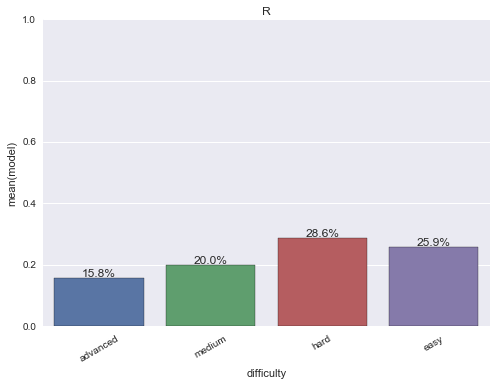

In [260]:
result.set_index("difficulty")
difficulty_labels=("advanced", "hard", "medium", "easy")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

##setup styles
sns.set(style="darkgrid")

ax = sns.barplot(data=result, y="model", x="difficulty", ci=None, palette="deep")
ax.set_ylim(0,1)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30)
## add persentage axis

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:1.1f}%'.format(y*100), (x.mean(), y), 
            ha='center', va='bottom')


##
plt.title("R")
plt.show()

#ax.get_figure().savefig("ags2_difficulty.png", format='png', dpi=300)

In [261]:
result[result["difficulty"]=="easy"]

,name,model,difficulty
147,wool sheep,0,easy
84,library books,0,easy
108,pentagon five,0,easy
146,wise wiser,0,easy
143,whale ocean,0,easy
136,tired sleep,0,easy
118,saw cut,0,easy
116,row boat,0,easy
110,pilot fly,0,easy
37,day week,0,easy
